<h1>Imports</h1>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import pickle

import warnings
warnings.filterwarnings('ignore')

<h1>Loading the dataset</h1>

In [2]:
df=pd.read_csv('advertising.csv')
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


<h1>Preprocessing and visualizing the data</h1>

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [4]:
df.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


In [5]:
df.duplicated().sum()

0

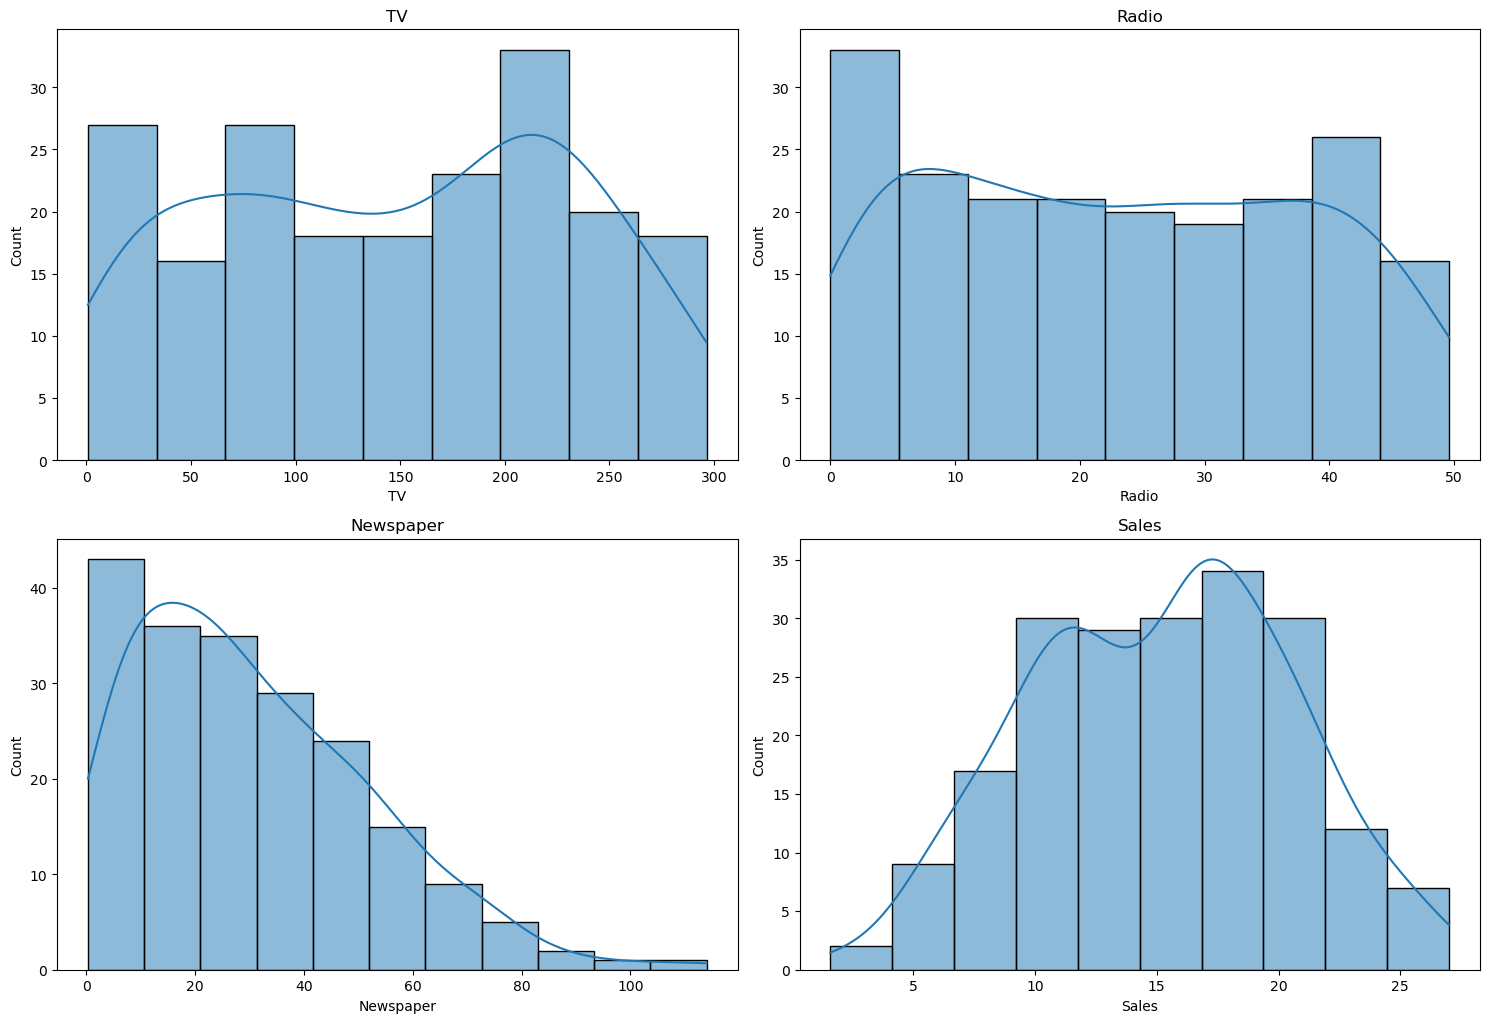

In [6]:
plt.figure(figsize=(15, 15))

columns_to_plot = ['TV', 'Radio', 'Newspaper', 'Sales']

for i, column in enumerate(columns_to_plot, 1):
    plt.subplot(3, 2, i)
    sns.histplot(data=df[column], kde=True)
    plt.title(column)
    plt.xlabel(column)

plt.tight_layout()
plt.show() 

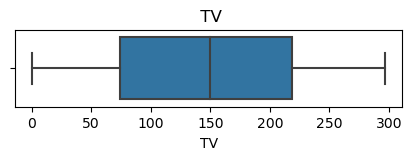

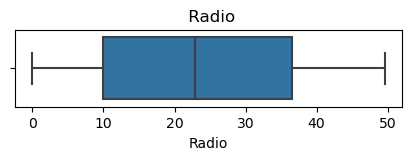

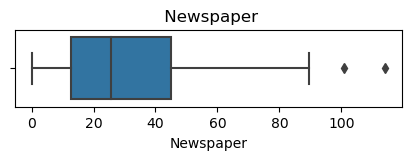

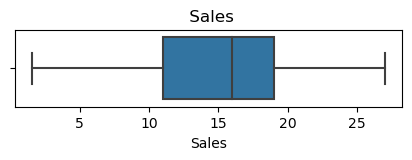

In [7]:
for col in df.columns:
    plt.figure(figsize=(5,1))
    sns.boxplot(x=col, data=df)
    plt.title(f' {col}')
    plt.show()

<h1>Scaling the data</h1>

In [8]:
x = df.drop('Sales', axis=1)
y = df['Sales']

In [10]:
scaler = StandardScaler()
scaler.fit(x)

StandardScaler()

In [11]:
scaled_x = scaler.transform(x)

<h1>Splitting the dataset into train data and test data</h1>

In [12]:
x_train,x_test,y_train,y_test=train_test_split(scaled_x,y,test_size=0.2,random_state=42)

<h1>Training the data into the model</h1>

In [14]:
model=LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

<h1>Predicting on data</h1>

In [15]:
predictions = model.predict(x_train)
predictions

array([11.91465765, 15.32881375,  9.91093345,  9.46132618, 17.23412363,
        7.22972412, 10.35454191, 15.23876611, 11.14036535, 11.71856758,
       13.85060866, 14.66570876, 10.44983379,  9.28550764,  9.02357336,
       12.47875166, 10.48712079, 24.99748731,  7.88523289, 15.8640533 ,
       21.30888748, 17.00814942, 12.79206695,  9.84041429, 21.01070892,
        7.48343928, 23.52204082,  7.05636619, 12.56968457, 10.08676368,
       11.1715446 ,  9.12566707, 16.92180225, 17.90167068, 15.63428805,
       18.26514616, 15.51584207, 19.23176429, 17.48701831, 21.82555114,
       10.58560762, 14.22101675, 10.75778538, 18.10690693,  9.94580615,
       17.38762989, 13.21321157, 23.7057409 , 11.04124955, 23.50498043,
        7.25377772, 19.17388849, 24.9725586 , 21.21199698, 18.85730214,
       16.49383903, 13.90044002, 11.26132856, 19.58689909, 15.32197517,
       15.91287266, 10.29394498, 20.24916557, 12.59260311, 21.37507598,
       11.62060518,  9.00761916, 19.44123849, 15.85637182, 18.57

<h1>Checking the accuracy of the model</h1>

In [16]:
print(r2_score(y_train,predictions))

0.9001416005862131


<h1>Predicting on test data</h1>

In [17]:
test_predictions=model.predict(x_test)

In [18]:
print(r2_score(y_test,test_predictions))

0.9059011844150825


<h1>Saving the mdoel</h1>

In [19]:
#pickle.dump(model,open('Model.pkl','wb'))

<h1>Concluding how actual data differs from predicted data</h1>

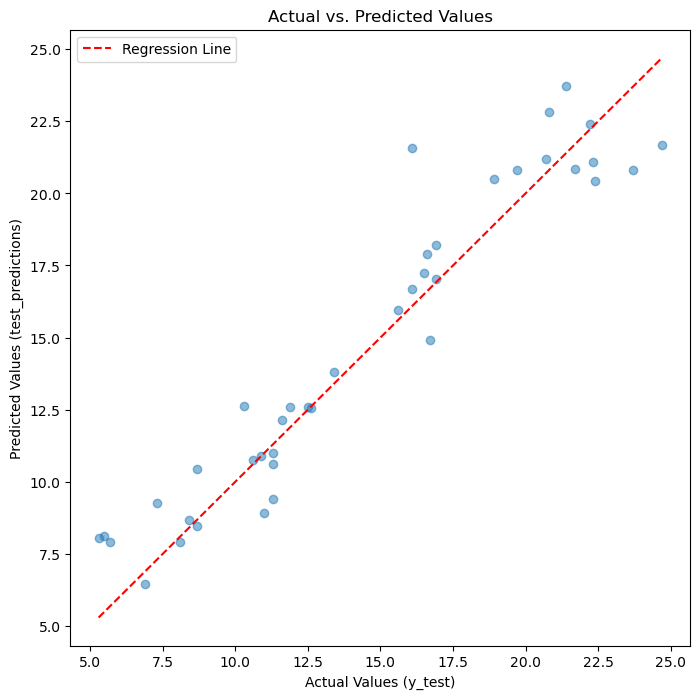

In [20]:
plt.figure(figsize=(8, 8))
plt.scatter(y_test, test_predictions, alpha=0.5)
plt.xlabel("Actual Values (y_test)")
plt.ylabel("Predicted Values (test_predictions)")
plt.title("Actual vs. Predicted Values")
regression_line_x = np.linspace(min(y_test), max(y_test), 100)
regression_line_y = regression_line_x
plt.plot(regression_line_x, regression_line_y, color='red', linestyle='--', label="Regression Line")
plt.legend()
plt.show()